In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

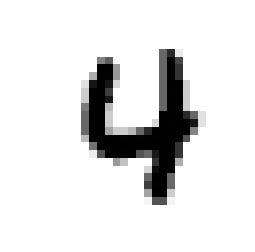

4.0

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy.random

random_digit = numpy.random.randint(10000, 50000)
some_digit = X[random_digit]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

y[random_digit]

In [4]:
import time
print('Start')
start_time = time.clock()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

print(sgd_clf.predict([some_digit]))
end_time = time.clock()
total_time = round((end_time - start_time), 4)
print('Time Elapsed: {} seconds'.format(total_time))

Start
[False]
Time Elapsed: 0.76 seconds


In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96255,  0.9567 ,  0.96585])

In [6]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54173,   406],
       [ 1892,  3529]])

In [7]:
from sklearn.metrics import precision_score, recall_score
mod_prec = precision_score(y_train_5, y_train_pred)
mod_rec = recall_score(y_train_5, y_train_pred)

print('Precision: {} (% correct prediction when positively predicting a 5)'.format(mod_prec))
print('Recall: {} (% of the actual 5\'s identified by the model)'.format(mod_rec))

from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)

print('F1: {} (harmonic mean of precision and recall)'.format(mod_prec))

Precision: 0.8968233799237612 (% correct prediction when positively predicting a 5)
Recall: 0.6509869027854639 (% of the actual 5's identified by the model)
F1: 0.8968233799237612 (harmonic mean of precision and recall)


[-518296.19144839]
[-296461.81092545 -685995.98771239 -303356.96960784 ..., -512312.27080849
 -950344.89783647   63091.7361766 ]


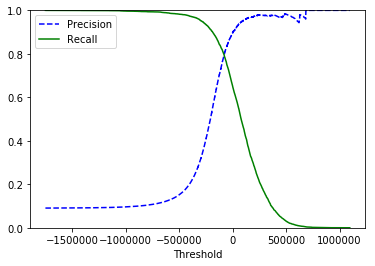

In [8]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.rcParams["figure.figsize"] = (2, 1)
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [9]:
y_train_pred_90 = (y_scores > 100000)

mod_prec = precision_score(y_train_5, y_train_pred_90)
mod_rec = recall_score(y_train_5, y_train_pred_90)

print('At 90% Precision:')
print('Precision: {} (% correct prediction when positively predicting a 5)'.format(mod_prec))
print('Recall: {} (% of the actual 5\'s identified by the model)'.format(mod_rec))

At 90% Precision:
Precision: 0.9538520213577422 (% correct prediction when positively predicting a 5)
Recall: 0.46135399372809444 (% of the actual 5's identified by the model)


<function matplotlib.pyplot.show>

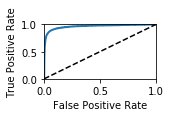

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.rcParams["figure.figsize"] = (2, 1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96344574256665505

In [12]:
import time
print('Start')
start_time = time.clock()

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

auc = roc_auc_score(y_train_5, y_scores_forest)

print('Area Under Curve: {}'.format(auc))
end_time = time.clock()
total_time = round((end_time - start_time), 2)
print('Time Elapsed: {} seconds'.format(total_time))

Start
Area Under Curve: 0.9933340331611941
Time Elapsed: 7.02 seconds
